In [ ]:
import pandas as pd

# Cargar archivo desde Google Drive o subir manualmente en Colab
from google.colab import files
uploaded = files.upload()

# Cargar el archivo Excel
file_name = list(uploaded.keys())[0]
xls = pd.ExcelFile(file_name)

Saving SP500_datos1y.xlsx to SP500_datos1y.xlsx


In [ ]:
# Cargar los datos de la hoja "s&p500"
df = xls.parse("s&p500")

# Mostrar las primeras filas para entender la estructura
df.head()


,Date,Close,High,Low,Open,Volume
0,2024-02-05,4942.810059,4957.189941,4918.089844,4957.189941,4023640000
1,2024-02-06,4954.229980,4957.770020,4934.879883,4950.160156,4440880000
2,2024-02-07,4995.060059,4999.890137,4969.049805,4973.049805,4895590000
3,2024-02-08,4997.910156,5000.399902,4987.089844,4995.160156,4341860000
4,2024-02-09,5026.609863,5030.060059,5000.339844,5004.169922,3912990000


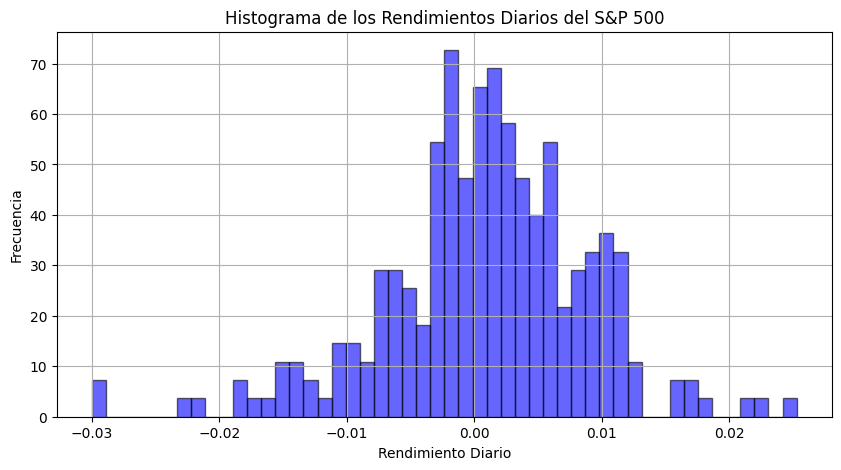

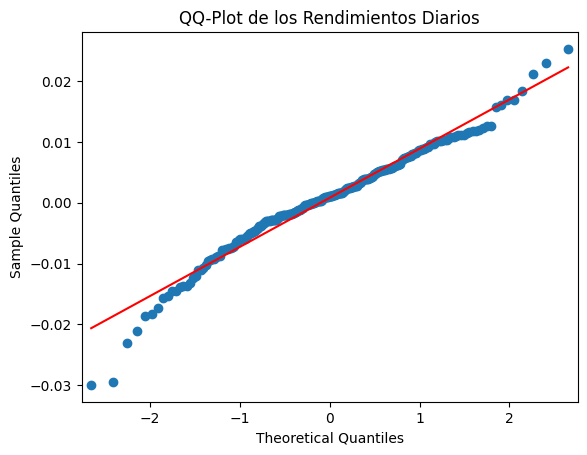

{'Shapiro-Wilk p-value': 0.00019942770192792118,
 'Kolmogorov-Smirnov p-value': 0.08108592994642272,
 'Jarque-Bera p-value': 2.583790737076624e-08}

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Calcular los rendimientos diarios
df["Returns"] = df["Close"].pct_change().dropna()


# Eliminar valores NaN generados por el cálculo de retornos
df = df.dropna()


# Gráfico del histograma
plt.figure(figsize=(10,5))
plt.hist(df["Returns"], bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
plt.title("Histograma de los Rendimientos Diarios del S&P 500")
plt.xlabel("Rendimiento Diario")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# QQ-Plot para ver la normalidad
sm.qqplot(df["Returns"], line='s')
plt.title("QQ-Plot de los Rendimientos Diarios")
plt.show()

# Pruebas estadísticas de normalidad
shapiro_test = stats.shapiro(df["Returns"])
ks_test = stats.kstest(df["Returns"], 'norm', args=(df["Returns"].mean(), df["Returns"].std()))
jarque_bera_test = stats.jarque_bera(df["Returns"])

# Mostrar resultados
normality_tests = {
    "Shapiro-Wilk p-value": shapiro_test.pvalue,
    "Kolmogorov-Smirnov p-value": ks_test.pvalue,
    "Jarque-Bera p-value": jarque_bera_test.pvalue
}

normality_tests


In [ ]:
df.head()

,Date,Close,High,Low,Open,Volume,Returns
1,2024-02-06,4954.229980,4957.770020,4934.879883,4950.160156,4440880000,0.002310
2,2024-02-07,4995.060059,4999.890137,4969.049805,4973.049805,4895590000,0.008241
3,2024-02-08,4997.910156,5000.399902,4987.089844,4995.160156,4341860000,0.000571
4,2024-02-09,5026.609863,5030.060059,5000.339844,5004.169922,3912990000,0.005742
5,2024-02-12,5021.839844,5048.390137,5016.830078,5026.830078,3805740000,-0.000949


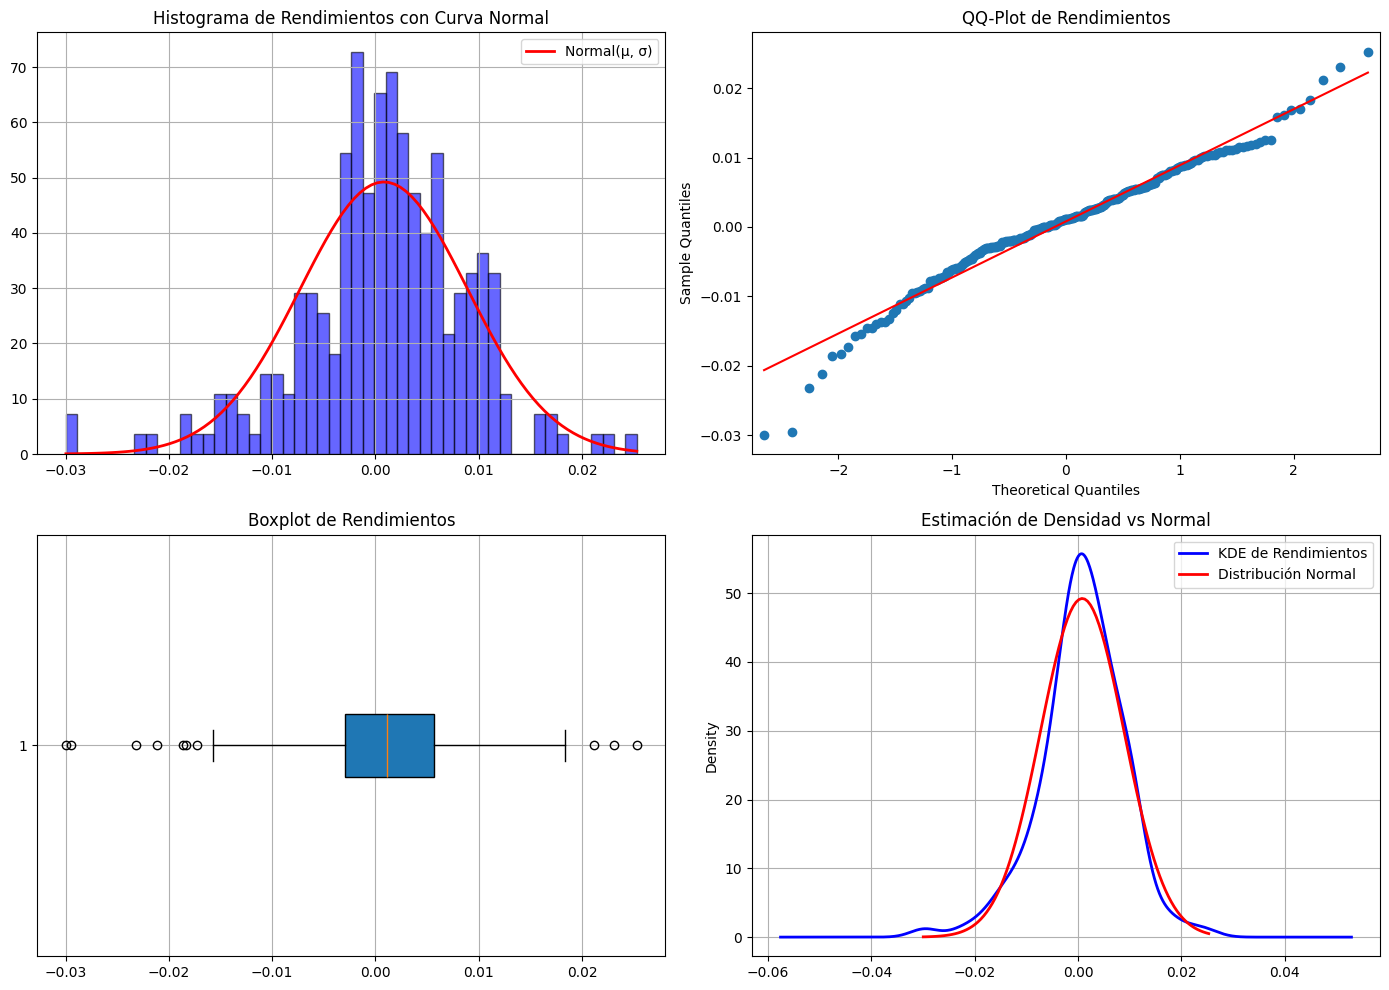

{'Media': 0.0008078476718989158,
 'Mediana': 0.0011160825806737495,
 'Desviación Estándar': 0.00810373040027762,
 'Asimetría (Skewness)': -0.4937867410729748,
 'Curtosis (Fisher)': 1.5468302434399215,
 'Shapiro-Wilk p-value': 0.00019942770192792118,
 'Kolmogorov-Smirnov p-value': 0.08108592994642272,
 'Jarque-Bera p-value': 2.583790737076624e-08,
 "D'Agostino p-value": 2.9171882918305208e-05,
 'Anderson-Darling Statistic': 1.4911854150230965,
 'Anderson-Darling Critical Values': array([0.567, 0.646, 0.775, 0.904, 1.075])}

In [ ]:
# Cálculo de estadísticas descriptivas clave
mean = df["Returns"].mean()
median = df["Returns"].median()
std_dev = df["Returns"].std()
skewness = stats.skew(df["Returns"])  # Asimetría
kurtosis = stats.kurtosis(df["Returns"], fisher=True)  # Curtosis ajustada a normal=0

# Gráficos más detallados
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Histograma con curva de densidad normal superpuesta
x = np.linspace(df["Returns"].min(), df["Returns"].max(), 100)
pdf = stats.norm.pdf(x, mean, std_dev)
ax[0, 0].hist(df["Returns"], bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
ax[0, 0].plot(x, pdf, 'r', linewidth=2, label="Normal(µ, σ)")
ax[0, 0].set_title("Histograma de Rendimientos con Curva Normal")
ax[0, 0].legend()
ax[0, 0].grid()

# QQ-Plot para visualización de normalidad
sm.qqplot(df["Returns"], line='s', ax=ax[0, 1])
ax[0, 1].set_title("QQ-Plot de Rendimientos")

# Boxplot para identificar valores atípicos
ax[1, 0].boxplot(df["Returns"], vert=False, patch_artist=True)
ax[1, 0].set_title("Boxplot de Rendimientos")
ax[1, 0].grid()

# Densidad estimada con Kernel Density Estimation (KDE)
df["Returns"].plot(kind='density', ax=ax[1, 1], color="blue", linewidth=2, label="KDE de Rendimientos")
ax[1, 1].plot(x, pdf, 'r', linewidth=2, label="Distribución Normal")
ax[1, 1].set_title("Estimación de Densidad vs Normal")
ax[1, 1].legend()
ax[1, 1].grid()

plt.tight_layout()
plt.show()

# Pruebas de normalidad adicionales
dagostino_test = stats.normaltest(df["Returns"])  # Prueba de D'Agostino
anderson_test = stats.anderson(df["Returns"], dist='norm')  # Prueba de Anderson-Darling

# Resultados detallados
normality_results = {
    "Media": mean,
    "Mediana": median,
    "Desviación Estándar": std_dev,
    "Asimetría (Skewness)": skewness,
    "Curtosis (Fisher)": kurtosis,
    "Shapiro-Wilk p-value": shapiro_test.pvalue,
    "Kolmogorov-Smirnov p-value": ks_test.pvalue,
    "Jarque-Bera p-value": jarque_bera_test.pvalue,
    "D'Agostino p-value": dagostino_test.pvalue,
    "Anderson-Darling Statistic": anderson_test.statistic,
    "Anderson-Darling Critical Values": anderson_test.critical_values,
}

normality_results


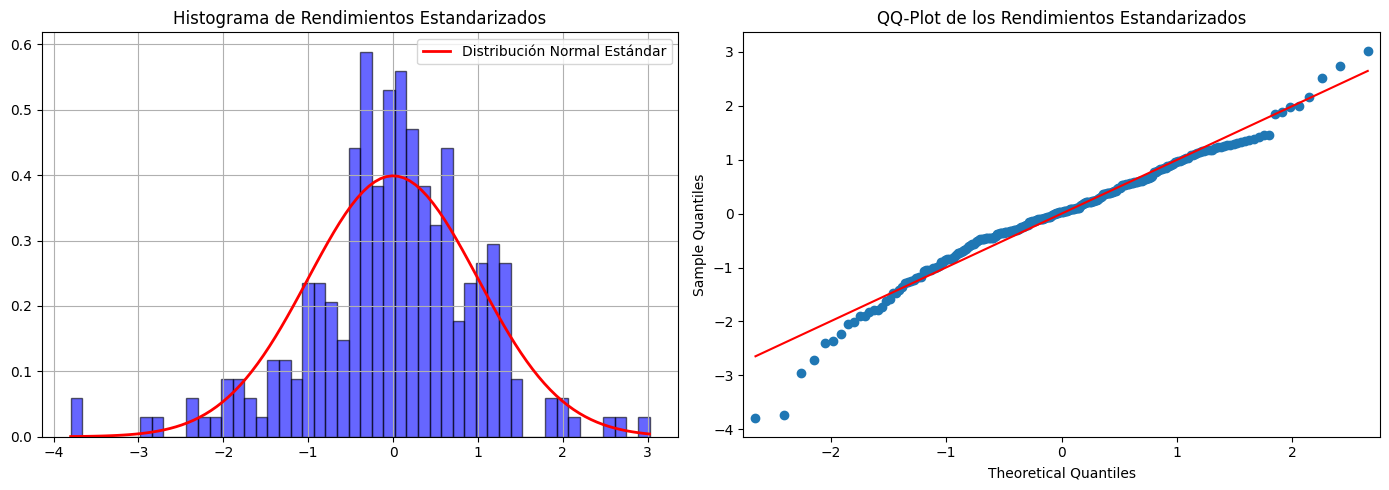

{'Shapiro-Wilk p-value': 0.00019942770192789443,
 'Kolmogorov-Smirnov p-value': 0.08108592994642272,
 'Jarque-Bera p-value': 2.5837907370767013e-08,
 "D'Agostino p-value": 2.917188291830538e-05,
 'Anderson-Darling Statistic': 1.4911854150230397,
 'Anderson-Darling Critical Values': array([0.567, 0.646, 0.775, 0.904, 1.075])}

In [ ]:
# Estandarización (Z-score) de los rendimientos
df["Returns_Standardized"] = (df["Returns"] - df["Returns"].mean()) / df["Returns"].std()

# Gráfico de histograma con distribución normal estándar superpuesta
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de rendimientos estandarizados
x = np.linspace(df["Returns_Standardized"].min(), df["Returns_Standardized"].max(), 100)
pdf = stats.norm.pdf(x, 0, 1)  # Distribución normal estándar (media=0, sigma=1)

ax[0].hist(df["Returns_Standardized"], bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
ax[0].plot(x, pdf, 'r', linewidth=2, label="Distribución Normal Estándar")
ax[0].set_title("Histograma de Rendimientos Estandarizados")
ax[0].legend()
ax[0].grid()

# QQ-Plot para ver si ahora se parece más a una normal
sm.qqplot(df["Returns_Standardized"], line='s', ax=ax[1])
ax[1].set_title("QQ-Plot de los Rendimientos Estandarizados")

plt.tight_layout()
plt.show()

# Repetir pruebas de normalidad en los datos estandarizados
shapiro_test_std = stats.shapiro(df["Returns_Standardized"])
ks_test_std = stats.kstest(df["Returns_Standardized"], 'norm', args=(0, 1))
jarque_bera_test_std = stats.jarque_bera(df["Returns_Standardized"])
dagostino_test_std = stats.normaltest(df["Returns_Standardized"])
anderson_test_std = stats.anderson(df["Returns_Standardized"], dist='norm')

# Mostrar resultados
standardized_normality_results = {
    "Shapiro-Wilk p-value": shapiro_test_std.pvalue,
    "Kolmogorov-Smirnov p-value": ks_test_std.pvalue,
    "Jarque-Bera p-value": jarque_bera_test_std.pvalue,
    "D'Agostino p-value": dagostino_test_std.pvalue,
    "Anderson-Darling Statistic": anderson_test_std.statistic,
    "Anderson-Darling Critical Values": anderson_test_std.critical_values,
}

standardized_normality_results


In [ ]:
df.head()

,Date,Close,High,Low,Open,Volume,Returns,Returns_Standardized
1,2024-02-06,4954.229980,4957.770020,4934.879883,4950.160156,4440880000,0.002310,0.185416
2,2024-02-07,4995.060059,4999.890137,4969.049805,4973.049805,4895590000,0.008241,0.917307
3,2024-02-08,4997.910156,5000.399902,4987.089844,4995.160156,4341860000,0.000571,-0.029278
4,2024-02-09,5026.609863,5030.060059,5000.339844,5004.169922,3912990000,0.005742,0.608916
5,2024-02-12,5021.839844,5048.390137,5016.830078,5026.830078,3805740000,-0.000949,-0.216789
